In [63]:
#importing necessary libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [64]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [79]:
#Type of data present

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [65]:
#Check if there are any null values present in the data

df.isnull().any().sum()

0

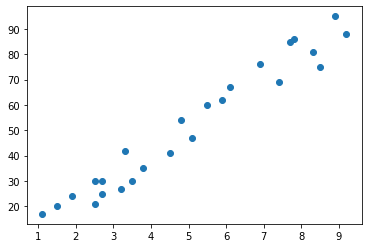

In [80]:
#Plotting the graph
plt.scatter(df['Hours'], df['Scores'])
plt.show()

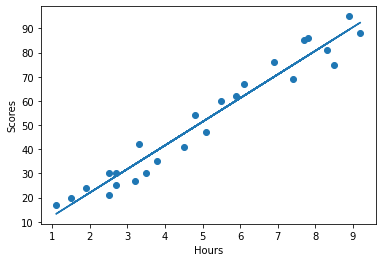

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [81]:
x=df['Hours']
y=df['Scores']
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

m = list(map(myfunc, x))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(x, y)
plt.plot(x, m)
plt.show()
print(df.corr())

In [82]:
#Splitting the data

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
#Prediction
regression = LinearRegression()
regression.fit(X_train,y_train)
pred_y = regression.predict(X_test)

In [84]:
#Accuracy
r2_score(y_test,pred_y)*100

94.54906892105353

In [93]:
Compare = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})  
Compare 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


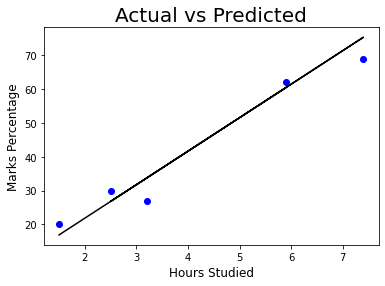

In [88]:
#Plotting the graph between actual and predicted values
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [92]:
#predict with own data
hours = 9.25
own_pred = regression.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737539
